# CAD Laboratory (CE4P001) - Assignment No. 2


**Name:** Amiya Das  <br>
**Roll No.:** 22CE01057 <br>

<h3>Question-2</h3>

With respect to a two-dimensional rectangular cartesian coordinates system with orthonormal base vectors $(e_{1},e_{2})$, let the rectangular coordinates of a point be denoted by $(X_{1},X_{2})$. Consider a two-dimensional annular body $\mathcal{B}$ which occupies the region:

<div style="margin-left: 40px">

$\mathcal{B}=\{(X_{1},X_{2})|1<\sqrt{X_{1}^{2}+X_{2}^{2}}<2\}$.

Because of the annual nature of the body consider a polar coordinates system in which the coordinates of points are expressed in terms $(R, \theta)$, which are related to the rectangular coordinates $(X_{1},X_{2})$ by:
$$R=\sqrt{X_{1}^{2}+X_{2}^{2}} and \theta=\tan^{-1}(X_{2}/X_{1})$$

Further, the orthonormal base vectors $(e_{r},e_{\theta})$ of the polar coordinate system are related to $(e_{1},e_{2})$ by:
$$e_{r}=\cos \theta e_{1}+\sin \theta e_{2}, e_{\theta}=-\sin \theta e_{1}+\cos \theta e_{2}$$

Draw the deformed configuration of the annular body associated with the following deformation using Julia:

$u_{r}=u\cdot e_{r}=0.4(R-1)^{2}\cos 3\theta$

$u_{\theta}=u\cdot e_{\theta}=0.4(R-1)^{3}$

</div>

**Hint:**
First set up some characteristic lines on the body in terms of their $(R, \theta)$ coordinates. Compute the $(X_{1},X_{2})$ coordinates from $$X_{1}=R \cos \theta, X_{2}=R \sin \theta$$.
For each point compute its displacement and add it to the original position by noting $x_{i}=e_{i}\cdot(X+u)=e_{i}\cdot(X+u_{r}e_{r}+u_{\theta}e_{\theta})$.

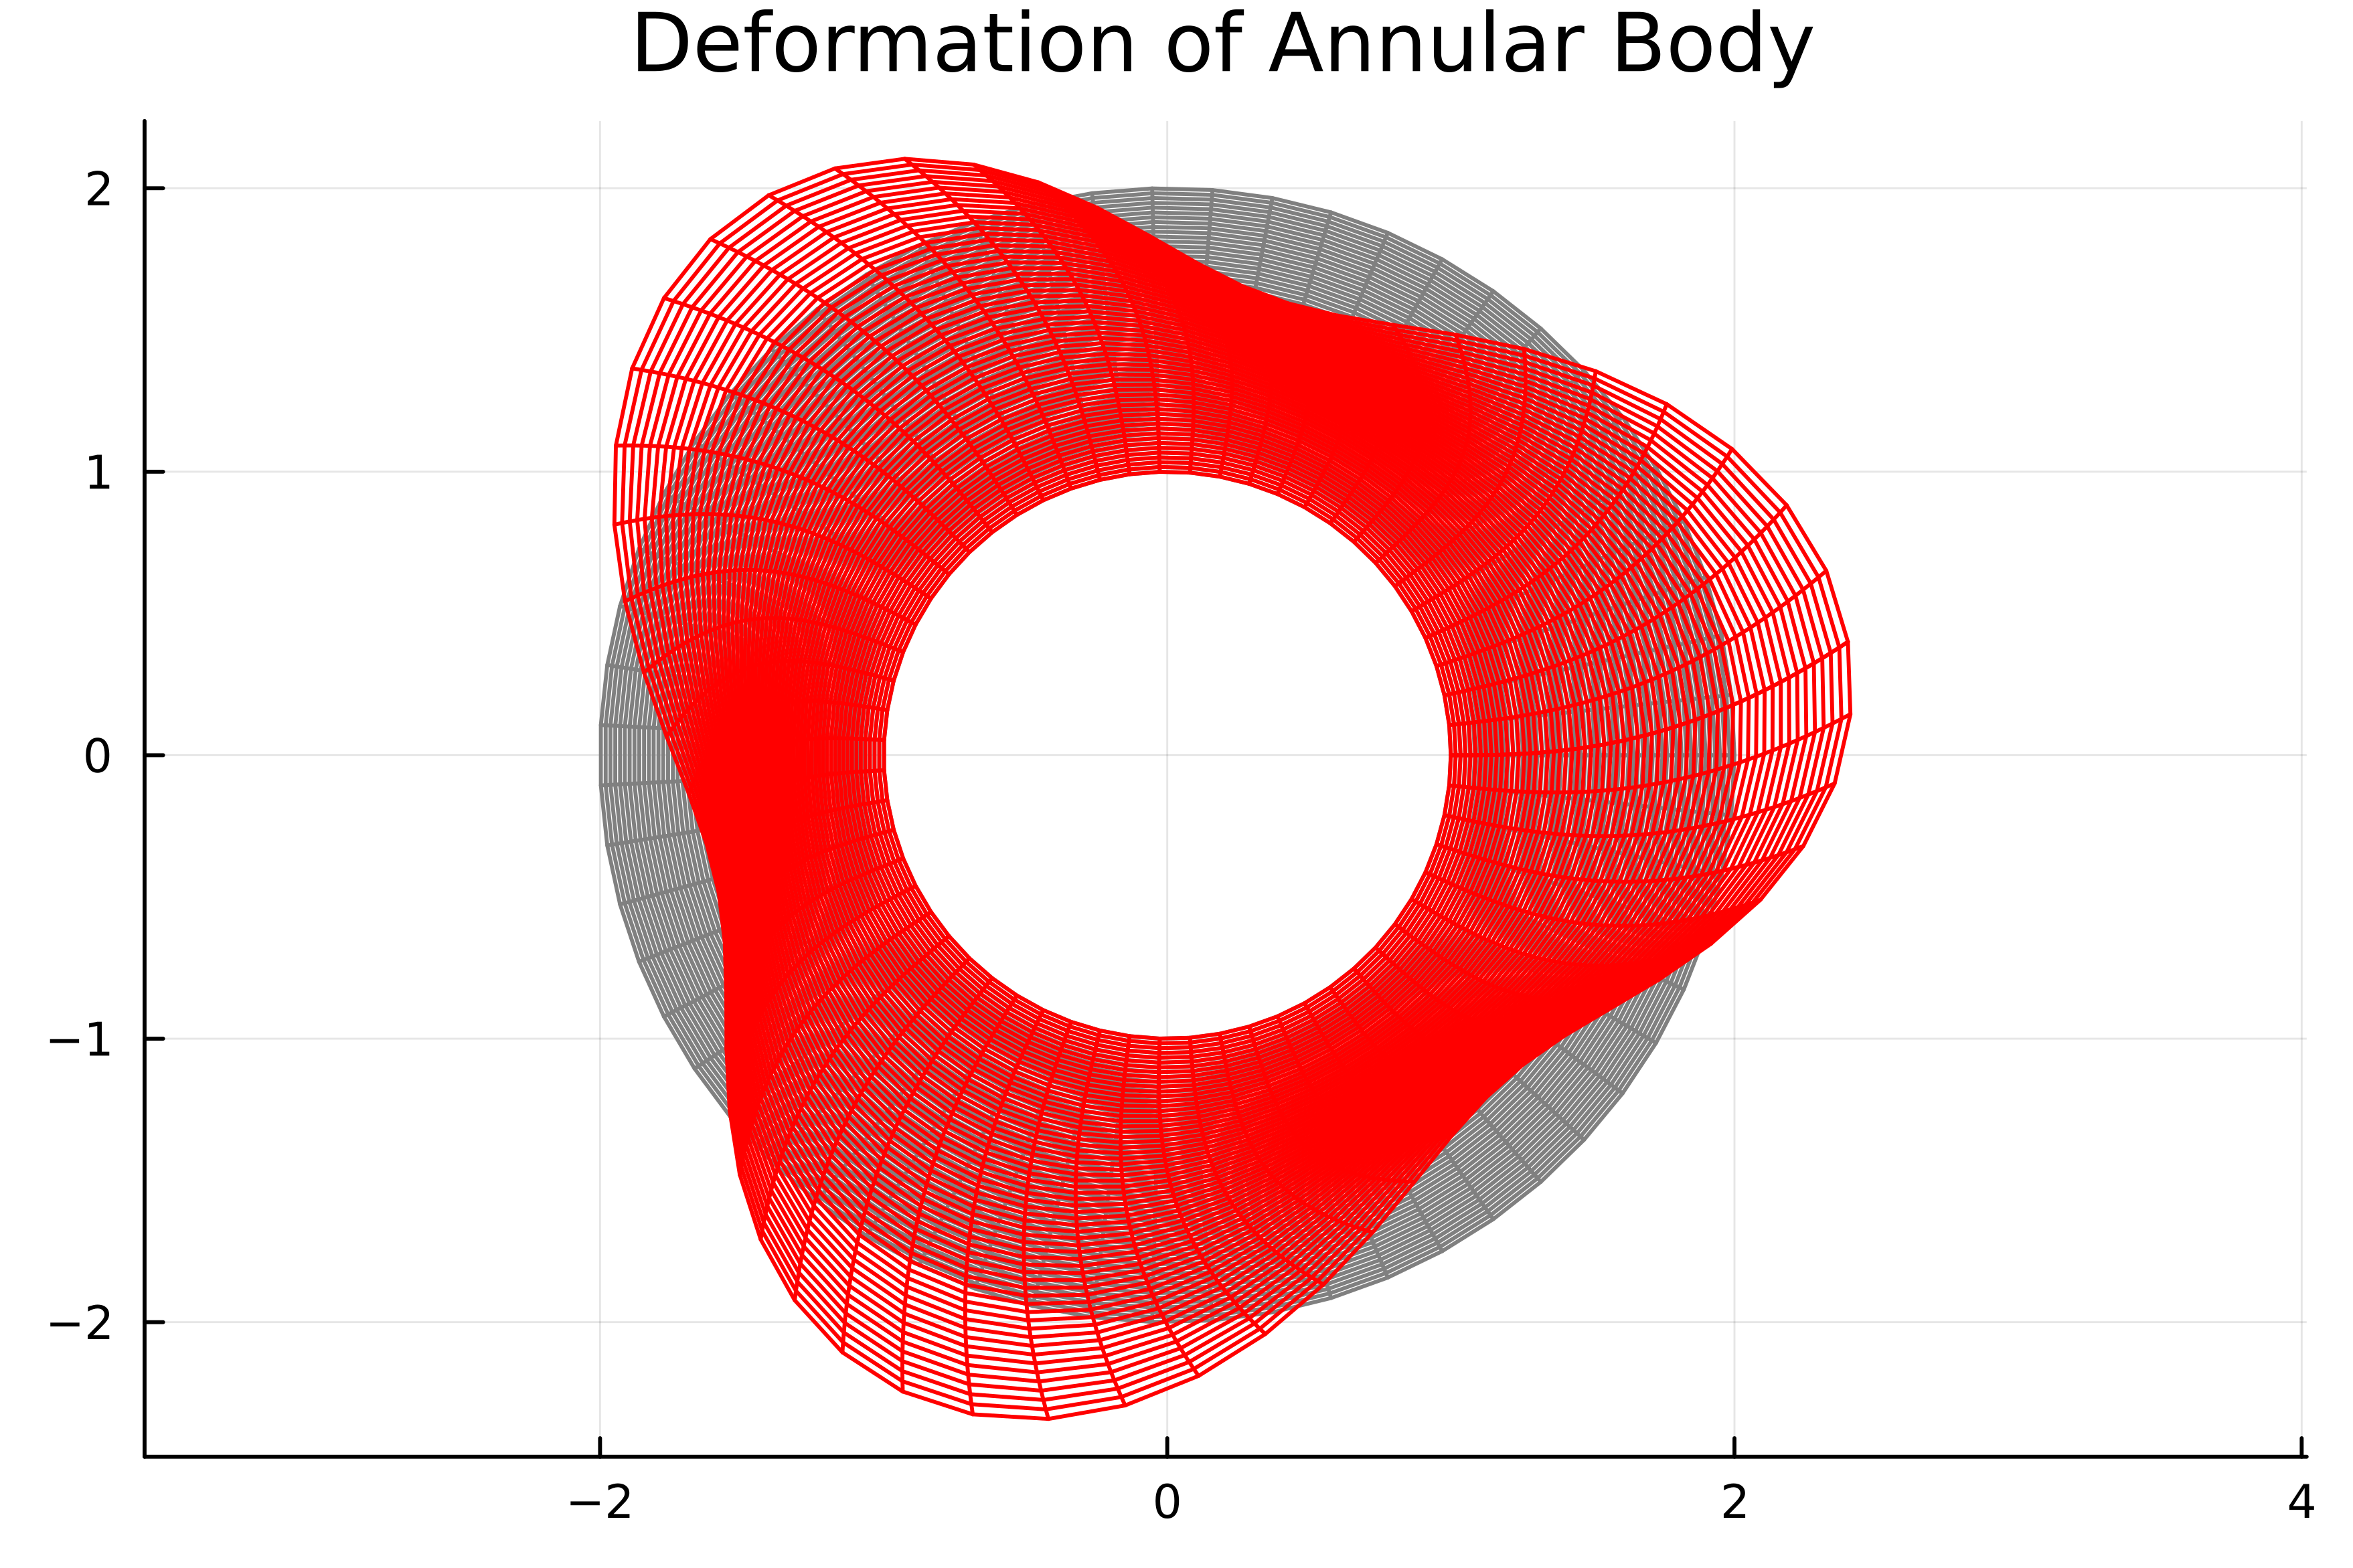

In [1]:
using Plots

# ------------------------------------------------------------
# Polar-to-Cartesian mapping
# ------------------------------------------------------------
cartesian(R, θ) = (R*cos(θ), R*sin(θ))

# ------------------------------------------------------------
# Displacement field
# u_r = 0.4 (R - 1)^2 cos(3θ)
# u_θ = 0.4 (R - 1)^3
# ------------------------------------------------------------
function displacement(R, θ)
    ur  = 0.4*(R - 1)^2 * cos(3θ)
    uth = 0.4*(R - 1)^3
    return ur, uth
end

# ------------------------------------------------------------
# Convert displacement in polar basis to Cartesian
# ------------------------------------------------------------
function polar_to_cartesian_disp(ur, uth, θ)
    ux =  ur*cos(θ) - uth*sin(θ)
    uy =  ur*sin(θ) + uth*cos(θ)
    return ux, uy
end

# ------------------------------------------------------------
# Generate characteristic mesh lines
# ------------------------------------------------------------
nR    = 60
nθ    = 60
Rvals = range(1, 2, length=nR)
θvals = range(0, 2π, length=nθ)

undeformed_x = []
undeformed_y = []
deformed_x   = []
deformed_y   = []

# Lines of constant θ
for θ in θvals
    X  = Float64[]
    Y  = Float64[]
    Xd = Float64[]
    Yd = Float64[]

    for R in Rvals
        x, y = cartesian(R, θ)
        push!(X, x); push!(Y, y)

        ur, uth = displacement(R, θ)
        ux, uy  = polar_to_cartesian_disp(ur, uth, θ)
        push!(Xd, x + ux); push!(Yd, y + uy)
    end

    push!(undeformed_x, X);  push!(undeformed_y, Y)
    push!(deformed_x,   Xd); push!(deformed_y,   Yd)
end

# Lines of constant R
for R in Rvals
    X  = Float64[]
    Y  = Float64[]
    Xd = Float64[]
    Yd = Float64[]

    for θ in θvals
        x, y = cartesian(R, θ)
        push!(X, x); push!(Y, y)

        ur, uth = displacement(R, θ)
        ux, uy  = polar_to_cartesian_disp(ur, uth, θ)
        push!(Xd, x + ux); push!(Yd, y + uy)
    end

    push!(undeformed_x, X);  push!(undeformed_y, Y)
    push!(deformed_x,   Xd); push!(deformed_y,   Yd)
end

# ------------------------------------------------------------
# Plot using Plots.jl
# ------------------------------------------------------------
plot(aspect_ratio=1, legend=false, linewidth=1.2,
     title="Deformation of Annular Body")

# undeformed (gray)
for i in eachindex(undeformed_x)
    plot!(undeformed_x[i], undeformed_y[i], color=:gray)
end

# deformed (red)
for i in eachindex(deformed_x)
    plot!(deformed_x[i], deformed_y[i], color=:red)
end

savefig("Deformation_2.png")
display(current())
